**Goals:**
- Develop a classification system that can classify the data into normal and fraudulent categories.
- The data is highly imbalanced; so we must apply some of the techniques to deal with data imbalance. Observe and report the performance of classification model with imbalanced and balanced data.
- Report the performance of our proposed model using accuracy, ROC, F1-score, precision, recall.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.isnull().sum().max()

0

There are no "Null" values, so we don't have to work on ways to replace values.

In [ ]:
# The classes are heavily skewed
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (0.17%) of the time in the dataframe.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

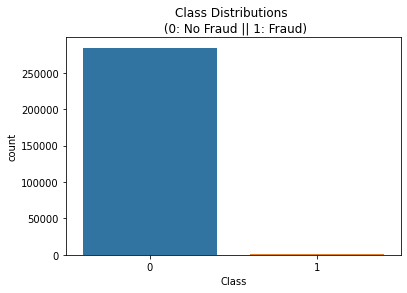

In [ ]:
# plot Class distributions
sns.countplot('Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


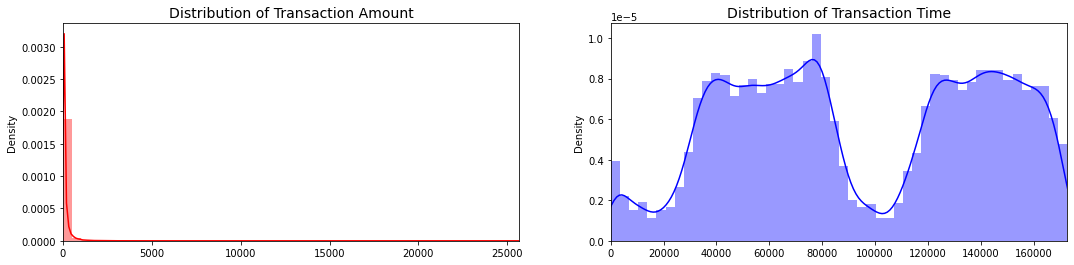

In [ ]:
# plot distribution of transactions amount and time
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

To normalize the distribution we are going to use a method called Feature Scaling. In our case it is better to use the Robust Scaler algorithm because it's robust to outliers

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
data['scaled_amount'] = rs.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rs.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=11)

####Logistic Regression without SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

   Non-fraud       1.00      1.00      1.00     71074
       Fraud       0.83      0.68      0.75       128

    accuracy                           1.00     71202
   macro avg       0.91      0.84      0.87     71202
weighted avg       1.00      1.00      1.00     71202



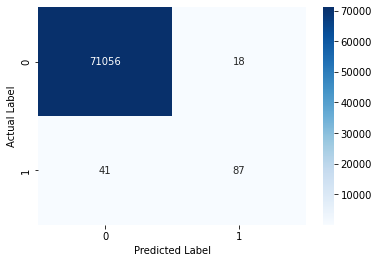

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

labels = ['Non-fraud', 'Fraud']
print(classification_report(y_test, y_pred, target_names=labels))

As we can see this is not a good model, because it is biased towards majority class and the recall in minority class is not as high as disired

Apply SMOTE to the data

Transaction Number X_train dataset:  (213605, 30)
Transaction Number y_train dataset:  (213605, 1)
Transaction Number X_test dataset:  (71202, 30)
Transaction Number y_test dataset:  (71202, 1)
Before OverSampling, counts of label '1': [364]
Before OverSampling, counts of label '0': [213241] 

After OverSampling, the shape of train_x: (426482, 30)
After OverSampling, the shape of train_y: (426482,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


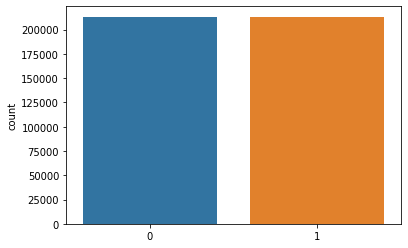

In [ ]:
from imblearn.over_sampling import SMOTE

print("Transaction Number X_train dataset: ", X_train.shape)
print("Transaction Number y_train dataset: ", y_train.shape)
print("Transaction Number X_test dataset: ", X_test.shape)
print("Transaction Number y_test dataset: ", y_test.shape)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=11)
X_train_s, y_train_s = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_x: {}'.format(X_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=data)

####Logistic Regression with SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       1.00      0.97      0.99     71074
           1       0.06      0.91      0.11       128

    accuracy                           0.97     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.97      0.99     71202



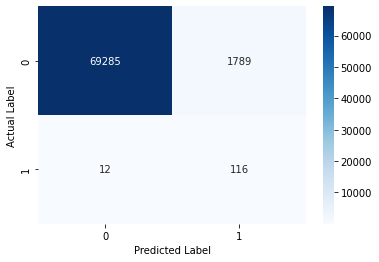

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_s, y_train_s)
y_pred = logreg.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Precision Recall Curve for Logistic Regression')

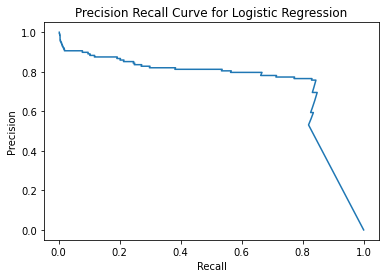

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Logistic Regression')

####Random Forest Classifier

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.98      0.78      0.87       128

    accuracy                           1.00     71202
   macro avg       0.99      0.89      0.93     71202
weighted avg       1.00      1.00      1.00     71202



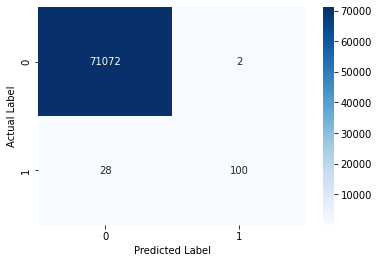

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
# Random Forest without SMOTE
rfc_model = rfc(random_state=11)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.87      0.80      0.83       128

    accuracy                           1.00     71202
   macro avg       0.94      0.90      0.92     71202
weighted avg       1.00      1.00      1.00     71202



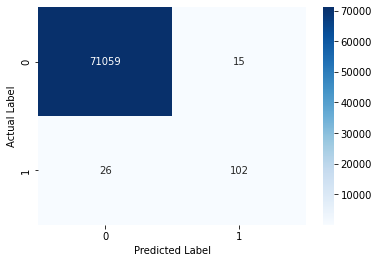

In [ ]:
# Random Forest with SMOTE
from sklearn.ensemble import RandomForestClassifier as rfc
rand_f = rfc(random_state=11)
rand_f.fit(X_train_s, y_train_s)
y_pred = rand_f.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='Blues', fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Precision Recall Curve for Random Forest')

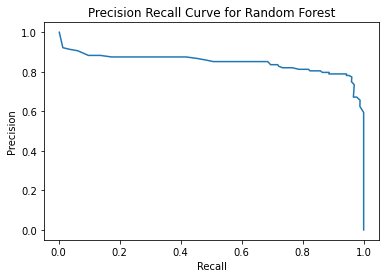

In [ ]:
y_pred_prob = rand_f.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for Random Forest')

Random Forest with SMOTE performed better than Logistic Regression overall allowing us to get high recall and high precision at the same time. Even though the recall has decreased a little bit, we were able to increase the precision significantly, which means a lot in the case of fraud detection and as we know it is a trade-off

####XGBoost

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.96      0.80      0.87       128

    accuracy                           1.00     71202
   macro avg       0.98      0.90      0.94     71202
weighted avg       1.00      1.00      1.00     71202



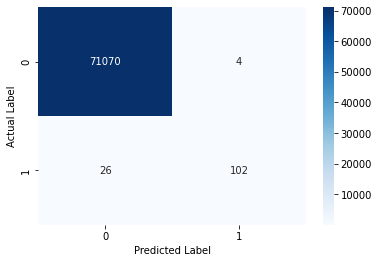

In [ ]:
import xgboost as xgb
# XGBoost without SMOTE
xgb_model = xgb.XGBClassifier(n_estimators=500, max_depth=30, learning_rate=0.1, n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71074
           1       0.85      0.83      0.84       128

    accuracy                           1.00     71202
   macro avg       0.92      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202



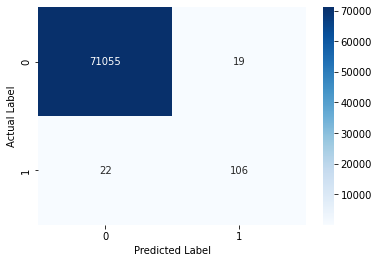

In [ ]:
import xgboost as xgb
# XGBoost with SMOTHE
model = xgb.XGBClassifier(n_estimators=500, max_depth=30, learning_rate=0.1, n_jobs=-1)
model.fit(X_train_s, y_train_s)
y_pred = model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(classification_report(y_test, y_pred))

Text(0.5, 1.0, 'Precision Recall Curve for XGBoost')

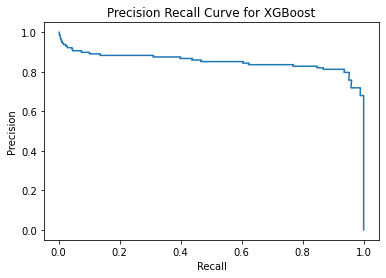

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve for XGBoost')

Random Forest and XGBoost Classifiers gave us the best results being able to detect more than 80% fraud transactions and at the same time not classifying a lot of non-fraud transactions as fraud

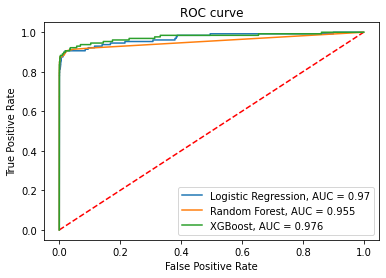

In [ ]:
#ROC AUC
# fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')

#Logistic Regression
preds_proba_lg = logreg.predict_proba(X_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Random Forest
preds_proba_rfc = rand_f.predict_proba(X_test)
probs_rfc = preds_proba_rfc[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probs_rfc)
auc_rfc = roc_auc_score(y_test, probs_rfc)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(auc_rfc,3))}')

#XGBoost
preds_proba_xgb = model.predict_proba(X_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')

plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()